In [1]:
import os
os.chdir("C:\\Users\\tsarcevic\\PycharmProjects\\fingerprinting-toolbox")

In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pickle
from datasets import GermanCredit

The goal: observe trends in utility decrease for machine learning algorithms over different data sets. Try and find the patterns. Do the models behave similarly? Can we estimate the ehaviour without running the comprehensive ML analysis on each dataset?

In [3]:
models = {'mlp':'Multi-Layer Perceptron', 
            'knn': 'k-NN',
             'gb': 'Gradient Boosting', 
             'rf': 'Random Forest', 
             'svm': 'SVM', 
             'lr': 'Logistic Regression'}

## 1. Accuracy loss vs %marks vs algorithm
### Fix: dataset, #attributes marked
### 1.1. German Credit

In [4]:
# baselines
with open('parameter_guidelines/evaluation/german_credit/utility_ml_baseline.pickle', 'rb') as infile:
    utility_ml_baseline = pickle.load(infile)

utility_fp_fpattr20_e80 = dict()
for model in models:    
    with open('parameter_guidelines/evaluation/german_credit/utility_fp_{}_fpattr20_e80.pickle'.format(model), 'rb') as infile:
        utility_fp_fpattr20_e80[model] = pickle.load(infile)
        
utility_fp_fpattr12_e80 = dict()
for model in models:
    try:
        with open('parameter_guidelines/evaluation/german_credit/utility_fp_{}_fpattr12_e80.pickle'.format(model), 'rb') as infile:
            utility_fp_fpattr12_e80[model] = pickle.load(infile)
    except FileNotFoundError:
        continue

In [5]:
x = 1.0 / np.array(list(utility_fp_fpattr20_e80['gb'].keys())) # percentage of marked rows

In [6]:
# baselines
baseline = dict()
baseline_y = dict()
for model in models:
    baseline[model] = np.mean(utility_ml_baseline[model])
    baseline_y[model] = [baseline[model] for x_i in x]

In [7]:
utility_ml_baseline_avg = {key: np.mean(utility) for key, utility in utility_ml_baseline.items()}
utility_ml_baseline_avg = dict(sorted(utility_ml_baseline_avg.items(), key=lambda x:x[1], reverse=True))
utility_ml_baseline_avg

{'gb': 0.768,
 'svm': 0.763,
 'mlp': 0.7620000000000001,
 'knn': 0.76,
 'lr': 0.758,
 'rf': 0.7549999999999999}

In [8]:
# fp attr 20
utility_fp_fpattr20_e80_avg = dict()
utility_fp_fpattr20_e80_avg_y = dict()
#fp attr 12
utility_fp_fpattr12_e80_avg = dict()
utility_fp_fpattr12_e80_avg_y = dict()

for model in models:
    utility_fp_fpattr20_e80_avg[model] = dict()
    utility_fp_fpattr12_e80_avg[model] = dict()

    for gamma in utility_fp_fpattr20_e80[model]:
        utility_fp_fpattr20_e80_avg[model][gamma] = np.mean([np.mean(experiment) for experiment in utility_fp_fpattr20_e80[model][gamma]])
        utility_fp_fpattr12_e80_avg[model][gamma] = np.mean([np.mean(experiment) for experiment in utility_fp_fpattr12_e80[model][gamma]])

    utility_fp_fpattr20_e80_avg_y[model] = utility_fp_fpattr20_e80_avg[model].values()
    utility_fp_fpattr12_e80_avg_y[model] = utility_fp_fpattr12_e80_avg[model].values()

In [9]:
# relative 
rel_loss_fpattr20 = dict()
rel_loss_fpattr12 = dict()
for model in models:
    rel_loss_fpattr20[model] = [(baseline[model]-u)/baseline[model] for u in utility_fp_fpattr20_e80_avg_y[model]]
    rel_loss_fpattr12[model] = [(baseline[model]-u)/baseline[model] for u in utility_fp_fpattr12_e80_avg_y[model]]

Text(0.5, 1.0, 'Accuracy loss vs %marks vs algorithm (fpattr 12)')

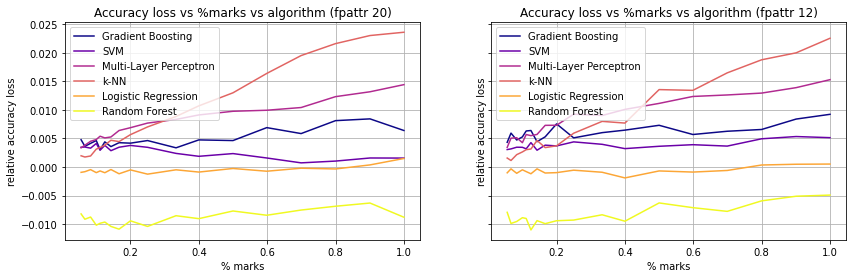

In [10]:
# UTILITY PLOT
fig, axs = plt.subplots(1,2, figsize=(14,4), sharey=True)
cmap = matplotlib.cm.get_cmap('plasma') # autumn
colors = [cmap(i*(1/5)) for i in range(6)] 
for ax in axs:
    ax.set_prop_cycle(color=colors) # color coding by baseline performance (darker->better performing model)

# RELATIVE LOSS
for model in utility_ml_baseline_avg:
    axs[0].plot(x, rel_loss_fpattr20[model], label=models[model])
    axs[1].plot(x, rel_loss_fpattr12[model], label=models[model])

for ax in axs:
    ax.set_xlabel('% marks')
    ax.set_ylabel('relative accuracy loss')
    ax.legend()
    ax.grid()
axs[0].set_title('Accuracy loss vs %marks vs algorithm (fpattr 20)')
axs[1].set_title('Accuracy loss vs %marks vs algorithm (fpattr 12)')

### 1.2. Adult

In [11]:
# baselines
with open('parameter_guidelines/evaluation/adult/utility_ml_baseline.pickle', 'rb') as infile:
    utility_ml_baseline = pickle.load(infile)
        
utility_fp_fpattr12_e30 = dict()  # all attributes
for model in models:
    try:
        with open('parameter_guidelines/evaluation/adult/utility_fp_{}_fpattr12_e30.pickle'.format(model), 'rb') as infile:
            utility_fp_fpattr12_e30[model] = pickle.load(infile)
    except FileNotFoundError:
        continue

In [12]:
#m = 'lr'

In [13]:
#del utility_fp_fpattr12_e30[m][1.43][21]

In [14]:
#utility_fp_fpattr12_e30[m]

In [15]:
#with open('parameter_guidelines/evaluation/adult/utility_fp_{}_fpattr12_e30.pickle'.format(m), 'wb') as outfile:
#            pickle.dump(utility_fp_fpattr12_e30[m], outfile)

In [16]:
x = 1.0 / np.array(list(utility_fp_fpattr12_e30['lr'].keys())) # percentage of marked rows

In [17]:
# baselines
baseline = dict()
baseline_y = dict()
for model in models:
    baseline[model] = np.mean(utility_ml_baseline[model])
    baseline_y[model] = [baseline[model] for x_i in x]

utility_ml_baseline_avg = {key: np.mean(utility) for key, utility in utility_ml_baseline.items()}
utility_ml_baseline_avg = dict(sorted(utility_ml_baseline_avg.items(), key=lambda x:x[1], reverse=True))

In [18]:
#fp attr 12
utility_fp_fpattr12_e30_avg = dict()
utility_fp_fpattr12_e30_avg_y = dict()

for model in models:
    if model not in utility_fp_fpattr12_e30:
        continue
    utility_fp_fpattr12_e30_avg[model] = dict()
    for gamma in utility_fp_fpattr12_e30[model]:
        utility_fp_fpattr12_e30_avg[model][gamma] = np.mean([np.mean(experiment) for experiment in utility_fp_fpattr12_e30[model][gamma]])
    utility_fp_fpattr12_e30_avg_y[model] = utility_fp_fpattr12_e30_avg[model].values()

In [19]:
# relative 
rel_loss_fpattr12 = dict()
for model in models:
    if model not in utility_fp_fpattr12_e30_avg_y:
        continue
    rel_loss_fpattr12[model] = [(baseline[model]-u)/baseline[model] for u in utility_fp_fpattr12_e30_avg_y[model]]

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Accuracy loss vs %marks vs algorithm (fpattr 12)')

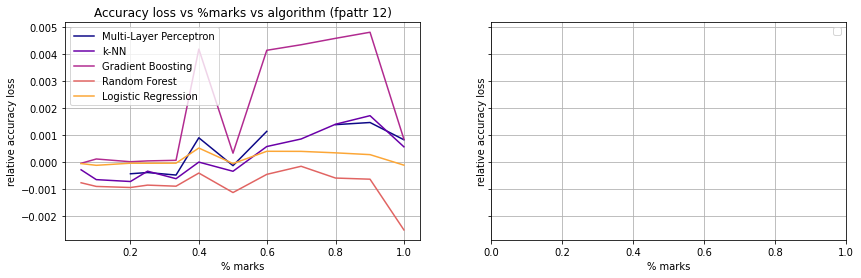

In [20]:
# UTILITY PLOT
fig, axs = plt.subplots(1,2, figsize=(14,4), sharey=True)
cmap = matplotlib.cm.get_cmap('plasma') # autumn
colors = [cmap(i*(1/5)) for i in range(6)] 
for ax in axs:
    ax.set_prop_cycle(color=colors) # color coding by baseline performance (darker->better performing model)

# RELATIVE LOSS
for model in models:
    if model not in rel_loss_fpattr12 or len(rel_loss_fpattr12[model]) != len(x):
        continue
    axs[0].plot(x, rel_loss_fpattr12[model], label=models[model])
    #axs[1].plot(x, rel_loss_fpattr12[model], label=models[model])

for ax in axs:
    ax.set_xlabel('% marks')
    ax.set_ylabel('relative accuracy loss')
    ax.legend()
    ax.grid()
axs[0].set_title('Accuracy loss vs %marks vs algorithm (fpattr 12)')
#axs[1].set_title('Accuracy loss vs %marks vs algorithm (fpattr 12)')

In [21]:
rel_loss_fpattr12

{'mlp': [0.0008184030120761964,
  0.0014576541698762707,
  0.0013785093287638612,
  nan,
  0.0011297676989562846,
  -0.0001417876110493113,
  0.0008914619631904478,
  -0.0004905377925853031,
  -0.00039660609178592655,
  -0.000442711980513828,
  nan,
  -0.0004922804097631892],
 'knn': [0.000556212361234381,
  0.0017107443436901845,
  0.001393667874347467,
  0.0008468827170645541,
  0.0005669687239980647,
  -0.0003502194830182837,
  -9.817276709582173e-06,
  -0.0006251647275077606,
  -0.00034661960363073827,
  -0.0007299669489835046,
  -0.0006601073837919802,
  -0.00029557285442558494],
 'gb': [0.000839167133194106,
  0.004804066528522384,
  0.004578232578244378,
  0.004340550473994334,
  0.004135133015963466,
  0.00032077694549616627,
  0.00417876509978239,
  5.646052100712305e-05,
  3.421698432436256e-05,
  3.4234575924247568e-06,
  0.00010521942101801427,
  -5.474136779923134e-05],
 'rf': [-0.00252432705319944,
  -0.000643881585423872,
  -0.0006014833795900554,
  -0.000164765308441942

In [22]:
x

array([1.        , 0.9009009 , 0.8       , 0.6993007 , 0.5988024 ,
       0.5       , 0.4       , 0.33333333, 0.25      , 0.2       ,
       0.1       , 0.05555556])

### 1.3. Bank Personal Loan

In [23]:
# baselines
with open('parameter_guidelines/evaluation/bank_personal_loan/utility_ml_baseline.pickle', 'rb') as infile:
    utility_ml_baseline = pickle.load(infile)

In [24]:
utility_fp_fpattr12_e50 = dict()  # all attributes
for model in models:
    try:
        with open('parameter_guidelines/evaluation/bank_personal_loan/utility_fp_{}_fpattr12_e50.pickle'.format(model), 'rb') as infile:
            utility_fp_fpattr12_e50[model] = pickle.load(infile)
    except FileNotFoundError:
        continue

In [25]:
x = 1.0 / np.array(list(utility_fp_fpattr12_e50['lr'].keys())) # percentage of marked rows

In [26]:
# baselines
baseline = dict()
baseline_y = dict()
for model in models:
    baseline[model] = np.mean(utility_ml_baseline[model])
    baseline_y[model] = [baseline[model] for x_i in x]

utility_ml_baseline_avg = {key: np.mean(utility) for key, utility in utility_ml_baseline.items()}
utility_ml_baseline_avg = dict(sorted(utility_ml_baseline_avg.items(), key=lambda x:x[1], reverse=True))

In [27]:
#fp attr 12
utility_fp_fpattr12_e50_avg = dict()
utility_fp_fpattr12_e50_avg_y = dict()

for model in models:
    if model not in utility_fp_fpattr12_e50:
        continue
    utility_fp_fpattr12_e50_avg[model] = dict()
    for gamma in utility_fp_fpattr12_e50[model]:
        utility_fp_fpattr12_e50_avg[model][gamma] = np.mean([np.mean(experiment) for experiment in utility_fp_fpattr12_e50[model][gamma]])
    utility_fp_fpattr12_e50_avg_y[model] = utility_fp_fpattr12_e50_avg[model].values()

In [28]:
# relative 
rel_loss_fpattr12 = dict()
for model in models:
    if model not in utility_fp_fpattr12_e50_avg_y:
        continue
    rel_loss_fpattr12[model] = [(baseline[model]-u)/baseline[model] for u in utility_fp_fpattr12_e50_avg_y[model]]

In [29]:
# temp x for integer gammas
x = [1, 2, 3, 4, 5, 10, 18]

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 1.0, 'Accuracy loss vs %marks vs algorithm (fpattr 12)')

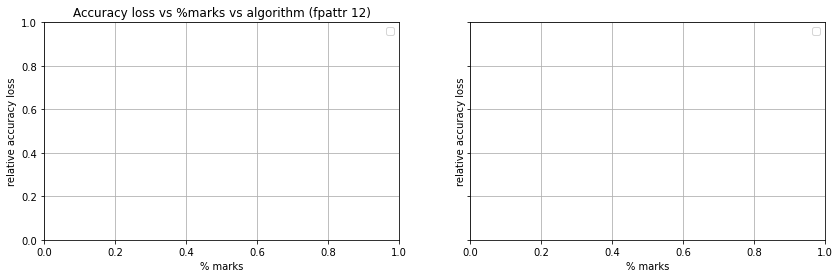

In [30]:
# UTILITY PLOT
fig, axs = plt.subplots(1,2, figsize=(14,4), sharey=True)
cmap = matplotlib.cm.get_cmap('plasma') # autumn
colors = [cmap(i*(1/5)) for i in range(6)] 
for ax in axs:
    ax.set_prop_cycle(color=colors) # color coding by baseline performance (darker->better performing model)

# RELATIVE LOSS
for model in models:
    if model not in rel_loss_fpattr12 or len(rel_loss_fpattr12[model]) != len(x):
        continue
    axs[0].plot(x, rel_loss_fpattr12[model], label=models[model])
    #axs[1].plot(x, rel_loss_fpattr12[model], label=models[model])

for ax in axs:
    ax.set_xlabel('% marks')
    ax.set_ylabel('relative accuracy loss')
    ax.legend()
    ax.grid()
axs[0].set_title('Accuracy loss vs %marks vs algorithm (fpattr 12)')
#axs[1].set_title('Accuracy loss vs %marks vs algorithm (fpattr 12)')

In [31]:
x

[1, 2, 3, 4, 5, 10, 18]

In [32]:
rel_loss_fpattr12['lr']

[2.1557531662496604e-05,
 0.0001023982753975694,
 0.0001023982753975694,
 7.006197790360012e-05,
 9.700889248175827e-05,
 0.00011856642414455405,
 0.00016168148746984642,
 0.0001670708703853584,
 0.00015629210455403528,
 0.00017784963621683106,
 0.00017246025330101993,
 0.00011856642414455405]

### 1.4. Breast Cancer

In [33]:
# baselines
with open('parameter_guidelines/evaluation/breast_cancer/utility_ml_baseline.pickle', 'rb') as infile:
    utility_ml_baseline = pickle.load(infile)
        
utility_fp_fpattr9_e50 = dict()  # all attributes
for model in models:
    try:
        with open('parameter_guidelines/evaluation/breast_cancer/utility_fp_{}_fpattr9_e50.pickle'.format(model), 'rb') as infile:
            utility_fp_fpattr9_e50[model] = pickle.load(infile)
    except FileNotFoundError:
        continue

In [34]:
x = 1.0 / np.array(list(utility_fp_fpattr9_e50['lr'].keys())) # percentage of marked rows

In [35]:
# baselines
baseline = dict()
baseline_y = dict()
for model in models:
    baseline[model] = np.mean(utility_ml_baseline[model])
    baseline_y[model] = [baseline[model] for x_i in x]

utility_ml_baseline_avg = {key: np.mean(utility) for key, utility in utility_ml_baseline.items()}
utility_ml_baseline_avg = dict(sorted(utility_ml_baseline_avg.items(), key=lambda x:x[1], reverse=True))

In [36]:
#fp attr 9
utility_fp_fpattr9_e50_avg = dict()
utility_fp_fpattr9_e50_avg_y = dict()

for model in models:
    if model not in utility_fp_fpattr9_e50:
        continue
    utility_fp_fpattr9_e50_avg[model] = dict()
    for gamma in utility_fp_fpattr9_e50[model]:
        utility_fp_fpattr9_e50_avg[model][gamma] = np.mean([np.mean(experiment) for experiment in utility_fp_fpattr9_e50[model][gamma]])
    utility_fp_fpattr9_e50_avg_y[model] = utility_fp_fpattr9_e50_avg[model].values()

In [37]:
# relative 
rel_loss_fpattr9 = dict()
for model in models:
    if model not in utility_fp_fpattr9_e50_avg_y:
        continue
    rel_loss_fpattr9[model] = [(baseline[model]-u)/baseline[model] for u in utility_fp_fpattr9_e50_avg_y[model]]

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Accuracy loss vs %marks vs algorithm (fpattr 9)')

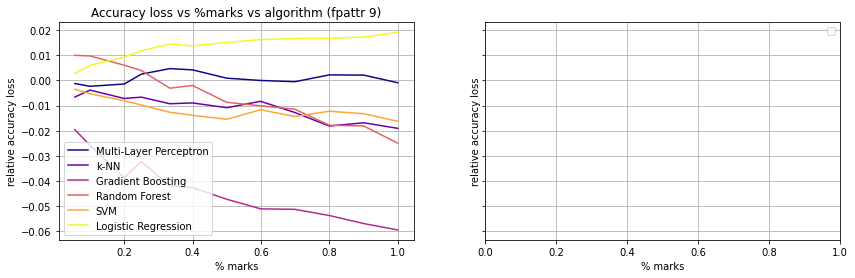

In [38]:
# UTILITY PLOT
fig, axs = plt.subplots(1,2, figsize=(14,4), sharey=True)
cmap = matplotlib.cm.get_cmap('plasma') # autumn
colors = [cmap(i*(1/5)) for i in range(6)] 
for ax in axs:
    ax.set_prop_cycle(color=colors) # color coding by baseline performance (darker->better performing model)

# RELATIVE LOSS
for model in models:
    if model not in rel_loss_fpattr9 or len(rel_loss_fpattr9[model]) != len(x):
        continue
    axs[0].plot(x, rel_loss_fpattr9[model], label=models[model])
    #axs[1].plot(x, rel_loss_fpattr9[model], label=models[model])

for ax in axs:
    ax.set_xlabel('% marks')
    ax.set_ylabel('relative accuracy loss')
    ax.legend()
    ax.grid()
axs[0].set_title('Accuracy loss vs %marks vs algorithm (fpattr 9)')
#axs[1].set_title('Accuracy loss vs %marks vs algorithm (fpattr 9)')

## All results

In [76]:
datasets = ['adult', 'german_credit', 'bank_personal_loan', 'breast_cancer', 'mushrooms', 'nursery'] # 'diabetic_data'

In [77]:
exp_properties = {
                'adult':{'fpattr':12, 'n_exp':30},
                 'german_credit':{'fpattr':20, 'n_exp':80},
                 'bank_personal_loan': {'fpattr':12, 'n_exp':50},
                 'breast_cancer': {'fpattr':9, 'n_exp':50},
                 'mushrooms': {'fpattr':22, 'n_exp':30},
                 'nursery': {'fpattr':8, 'n_exp':30}
                 #,'diabetic_data': {'fpattr':45, 'n_exp':30}
                 }

In [78]:
# baselines
utility_ml_baseline = dict()
for data in datasets:
    with open('parameter_guidelines/evaluation/{}/utility_ml_baseline.pickle'.format(data), 'rb') as infile:
        utility_ml_baseline[data] = pickle.load(infile)
        
utility_fp = dict()        
for data in datasets:        
    utility_fp[data] = dict()  # all attributes
    for model in models:
        try:
            with open('parameter_guidelines/evaluation/{}/utility_fp_{}_fpattr{}_e{}.pickle'.format(data, model, exp_properties[data]['fpattr'], exp_properties[data]['n_exp']), 'rb') as infile:
                utility_fp[data][model] = pickle.load(infile)
        except FileNotFoundError:
            print('file not found: ' + 'parameter_guidelines/evaluation/{}/utility_fp_{}_fpattr{}_e{}.pickle'.format(data, model, exp_properties[data]['fpattr'], exp_properties[data]['n_exp']))
            continue

In [80]:
x_german_credit = 1.0 / np.array(list(utility_fp['german_credit']['lr'].keys()))

In [55]:
x = 1.0 / np.array(list(utility_fp['adult']['lr'].keys())) # percentage of marked rows

In [56]:
# baselines
baseline = dict()
baseline_y = dict()
utility_ml_baseline_avg = dict()
for data in datasets:
    baseline[data] = dict()
    baseline_y[data] = dict()
    for model in models:
        baseline[data][model] = np.mean(utility_ml_baseline[data][model])
        baseline_y[data][model] = [baseline[data][model] for x_i in x]

    utility_ml_baseline_avg[data] = {key: np.mean(utility) for key, utility in utility_ml_baseline[data].items()}
    utility_ml_baseline_avg[data] = dict(sorted(utility_ml_baseline_avg[data].items(), key=lambda x:x[1], reverse=True))

In [58]:
utility_fp_avg = dict()
utility_fp_avg_y = dict()
for data in datasets:
    utility_fp_avg[data] = dict()
    utility_fp_avg_y[data] = dict()

    for model in models:
        if model not in utility_fp[data]:
            continue
        utility_fp_avg[data][model] = dict()
        for gamma in utility_fp[data][model]:
            utility_fp_avg[data][model][gamma] = np.mean([np.mean(experiment) for experiment in utility_fp[data][model][gamma]])
        utility_fp_avg_y[data][model] = utility_fp_avg[data][model].values()

In [60]:
# relative 
rel_loss = dict()
for data in datasets:
    rel_loss[data] = dict()
    for model in models:
        if model not in utility_fp_avg_y[data]:
            continue
        rel_loss[data][model] = [(baseline[data][model]-u)/baseline[data][model] for u in utility_fp_avg_y[data][model]]

In [99]:
# pickle some important objects
#with open('parameter_guidelines/UNECE_meeting/fp_effects_on_ML_pickle/rel_loss.pickle', 'wb') as outfile:
#    pickle.dump(rel_loss, outfile)
#with open('parameter_guidelines/UNECE_meeting/fp_effects_on_ML_pickle/x.pickle', 'wb') as outfile:
#    pickle.dump(x, outfile)
#with open('parameter_guidelines/UNECE_meeting/fp_effects_on_ML_pickle/x_german_credit.pickle', 'wb') as outfile:
#    pickle.dump(x_german_credit, outfile)
#with open('parameter_guidelines/UNECE_meeting/fp_effects_on_ML_pickle/utility_ml_baseline_avg.pickle', 'wb') as outfile:
#    pickle.dump(utility_ml_baseline_avg, outfile)

adult svm


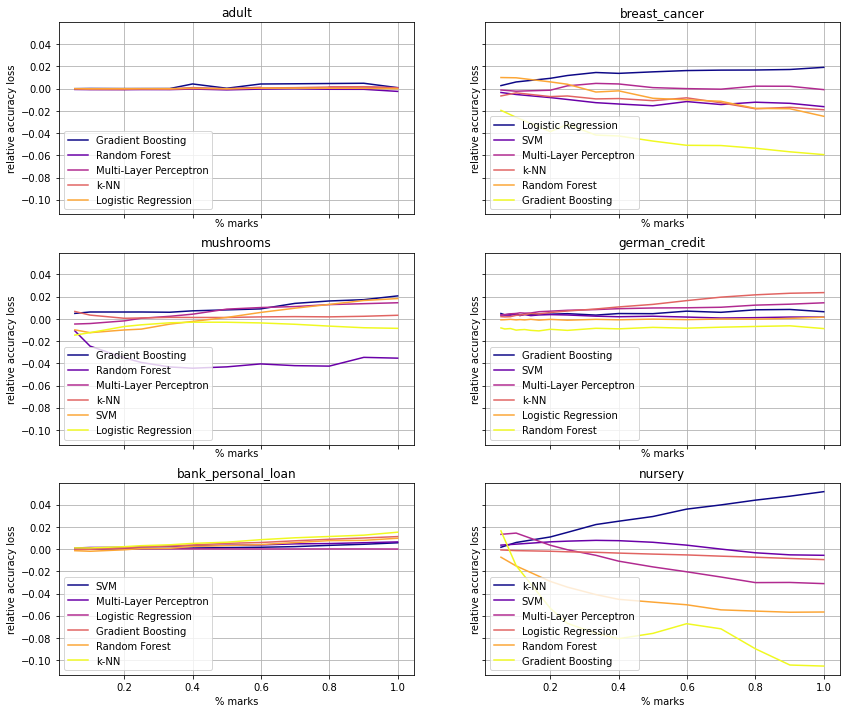

In [91]:
# UTILITY PLOT
fig, axs = plt.subplots(3,2, figsize=(14,12), sharey=True, sharex=True)
cmap = matplotlib.cm.get_cmap('plasma') # autumn
colors = [cmap(i*(1/5)) for i in range(6)] 
for ax_row in axs:
    for ax in ax_row:
        ax.set_prop_cycle(color=colors) # color coding by baseline performance (darker->better performing model)

# RELATIVE LOSS
for i, data in enumerate(datasets):
    for model in utility_ml_baseline_avg[data]:
        if data == 'german_credit':
            axs[i%3][i%2].plot(x_german_credit, rel_loss[data][model], label=models[model])
            axs[i%3][i%2].set_title(data)
            continue
        #elif data == 'nursery':# or data=='breast_cancer': #or (data=='mushrooms' and model=='rf'):
        #    continue
        if model not in rel_loss[data] or len(rel_loss[data][model]) != len(x):
            print(data, model)
            continue
        axs[i%3][i%2].plot(x, rel_loss[data][model], label=models[model])
        axs[i%3][i%2].set_title(data)

for ax_row in axs:
    for ax in ax_row:   
        ax.set_xlabel('% marks')
        ax.set_ylabel('relative accuracy loss')
        ax.legend()
        ax.grid()
    #axs[0].set_title('Accuracy loss vs %marks vs algorithm (fpattr 9)')
    #axs[1].set_title('Accuracy loss vs %marks vs algorithm (fpattr 9)')

The worse performing algorithms tend to have lower utility decreases, probably because they do not tend to generalise well at the first place. The better performing ones have much clearer trends of gradual utility decrease (as seen as in nursery, german_credit and breast cancer)

TODO: rank the data sets by size

There are some obvious outliers, such as:
- Random Forest for Mushroom dataset
- all trends for Breast Cancer, which are actually improving the performance, except for Logistic Regression
- MLP, kNN and Random Forest for nursery dataset, which are improving the performance; and SVM and Logistic Regression where more modifications have the opposite effect of what is expected, i.e. the decrease is getting lower 